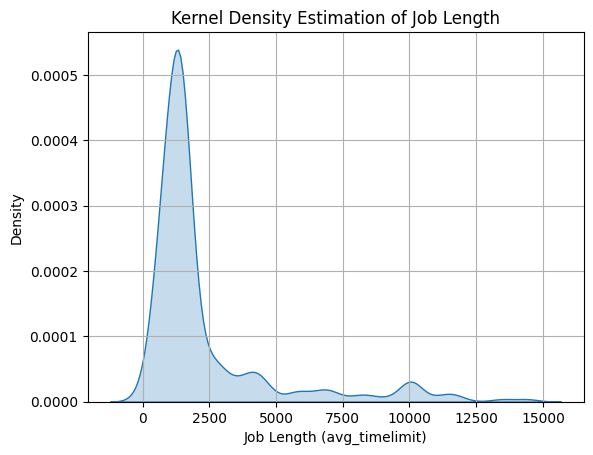

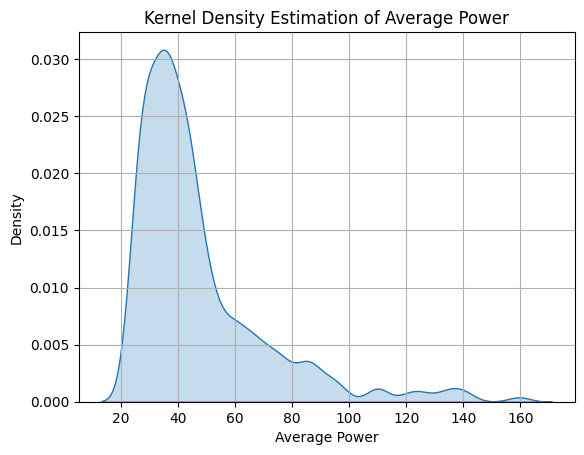

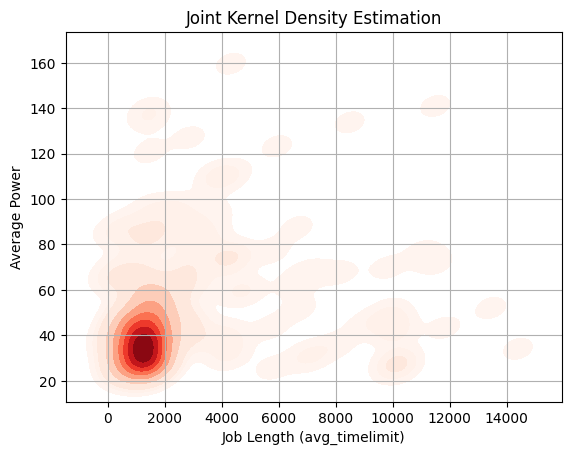

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filesummary_csv_file = '/scratch/cognit/workload_summary.csv'
df = pd.read_csv(filesummary_csv_file)

avg_timelimit = df.groupby('id_user')['avg_timelimit'].mean().reset_index()

avg_power = df.groupby('id_user')['avg_power'].mean().reset_index()

merged_df = pd.merge(avg_timelimit, avg_power, on='id_user')

filtered_df = merged_df[(merged_df['avg_timelimit'] >= 0) & (merged_df['avg_timelimit'] <= 15000)]

sns.kdeplot(filtered_df['avg_timelimit'], bw_adjust=0.5, fill=True)
plt.xlabel('Job Length (avg_timelimit)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Job Length')
plt.grid(True)
plt.show()

sns.kdeplot(filtered_df['avg_power'], bw_adjust=0.5, fill=True)
plt.xlabel('Average Power')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Average Power')
plt.grid(True)
plt.show()

sns.kdeplot(x=filtered_df['avg_timelimit'], y=filtered_df['avg_power'], fill=True, bw_adjust=0.5, cmap="Reds")
plt.xlabel('Job Length (avg_timelimit)')
plt.ylabel('Average Power')
plt.title('Joint Kernel Density Estimation')
plt.grid(True)
plt.show()